# **UTS Machine Learning**
### **Karimah Azzuhdu T.M. (140810170027)**

Deskripsi : <br>
Notebook ini berisi Analisis Data Titanic dan Data Preprocessing.
<br>
Output dari notebook ini adalah Dataset Titanic berbentuk csv untuk Pelatihan Model nanti.

### **Import Tools (Library)**

In [1]:
#Data Manipulation, Perhitungan Matematika, dsb
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

#Menghapus Warning yang tidak penting, untuk merapikan presentasi
import warnings
warnings.filterwarnings("ignore")

# EDA (Exploratory Data Analysis)

## Peek The Data

In [2]:
#import data titanic
data = pd.read_csv('train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dean, Mr. Bertram Frank",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
#Cek persentase yang selamat
data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

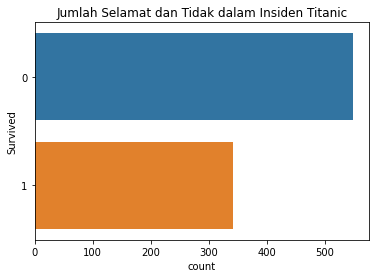

In [6]:
selamat = sns.countplot(y=data['Survived']).set_title('Jumlah Selamat dan Tidak dalam Insiden Titanic')

Jadi yang selamat hanya 38,4% dari seluruh Penumpang

## Analisis Feature

### Kelas Penumpang (Pclass)

In [7]:
print(data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


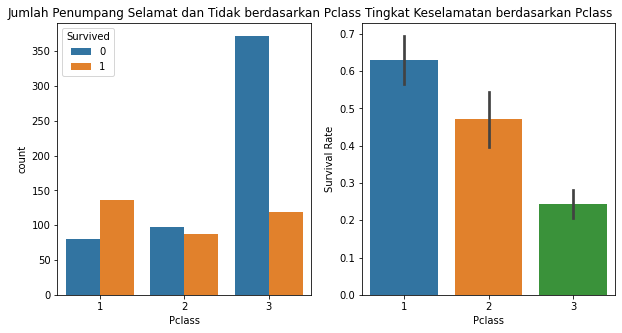

In [8]:
# Tingkat keselamatan berdasarkan Pclass
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
a = sns.countplot(x='Pclass', hue='Survived', data=data,  ax=axarr[0]).set_title('Jumlah Penumpang Selamat dan Tidak berdasarkan Pclass')
axarr[1].set_title('Tingkat Keselamatan berdasarkan Pclass')
b = sns.barplot(x='Pclass', y='Survived', data=data, ax=axarr[1]).set_ylabel('Survival Rate')

### Jenis Kelamin (Sex)

In [ ]:
print(data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


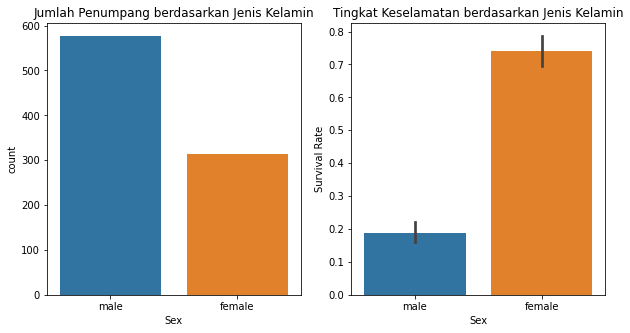

In [9]:
# Tingkat keselamatan berdasarkan Jenis Kelamin
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
a = sns.countplot(data['Sex'], ax=axarr[0]).set_title('Jumlah Penumpang berdasarkan Jenis Kelamin')
axarr[1].set_title('Tingkat Keselamatan berdasarkan Jenis Kelamin')
b = sns.barplot(x='Sex', y='Survived', data=data, ax=axarr[1]).set_ylabel('Survival Rate')

### Usia (Age)

In [10]:
#Describe Age
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
data['Age'].isnull().sum()

177

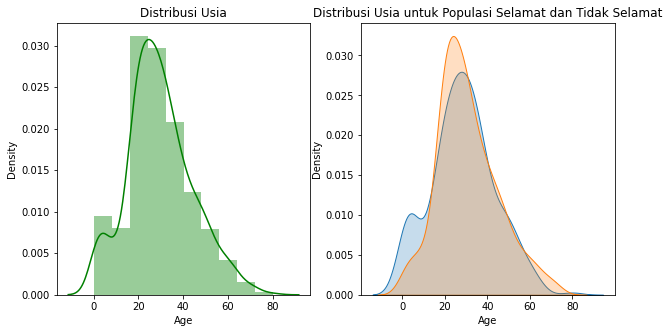

In [12]:
#Distibusi Usia
fig, axarr = plt.subplots(1,2,figsize=(10,5))
axarr[0].set_title('Distribusi Usia')
f = sns.distplot(data['Age'], color='g', bins=10, ax=axarr[0])
axarr[1].set_title('Distribusi Usia untuk Populasi Selamat dan Tidak Selamat')
g = sns.kdeplot(data['Age'].loc[data['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
g = sns.kdeplot(data['Age'].loc[data['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')

### SibSp

In [14]:
print(data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


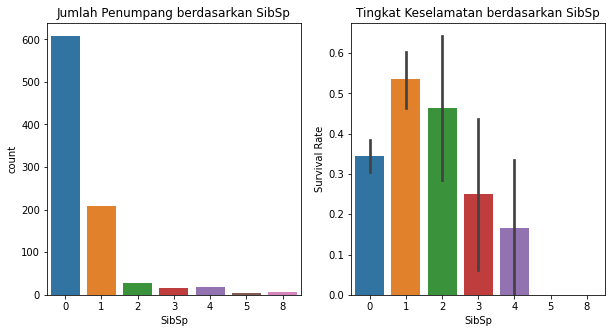

In [15]:
# Tingkat keselamatan berdasarkan SibSp
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
a = sns.countplot(x='SibSp', data=data,  ax=axarr[0]).set_title('Jumlah Penumpang berdasarkan SibSp')
axarr[1].set_title('Tingkat Keselamatan berdasarkan SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=data, ax=axarr[1]).set_ylabel('Survival Rate')

### Parch

In [21]:
print(data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


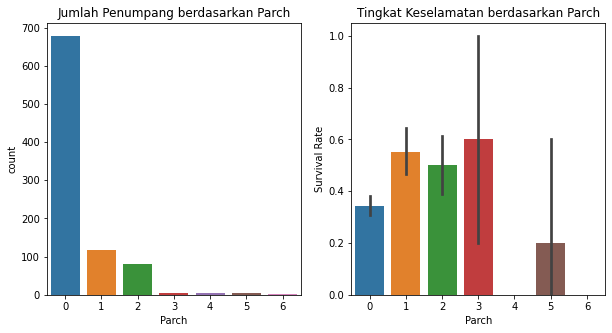

In [20]:
# Tingkat keselamatan berdasarkan Parch
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
a = sns.countplot(x='Parch', data=data,  ax=axarr[0]).set_title('Jumlah Penumpang berdasarkan Parch')
axarr[1].set_title('Tingkat Keselamatan berdasarkan Parch')
b = sns.barplot(x='Parch', y='Survived', data=data, ax=axarr[1]).set_ylabel('Survival Rate')

### Tarif (Fare)

In [17]:
#Describe Fare
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
data[data['Fare']==0].shape

(15, 12)

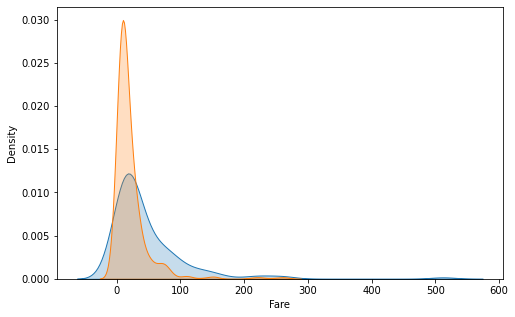

In [19]:
#Distribusi harga Tarif pada populasi Selamat dan Tidak Selamat
plt.figure(figsize=(8,5))
g = sns.kdeplot(data['Fare'].loc[data['Survived'] == 1], 
                shade= True, label='Survived').set_xlabel('Fare')
g = sns.kdeplot(data['Fare'].loc[data['Survived'] == 0], 
                shade=True, label='Not Survived')

### Ticket
Berbentuk Alfanumerik yang bervariasi. Menurut beberapa sumber atribut ini tidak akan berpengaruh pada training model. Maka lebih baik dihilangkan.

In [22]:
#macam-macam tiket
data['Ticket'].value_counts()

347082           7
CA. 2343         7
1601             7
347088           6
3101295          6
                ..
250643           1
347076           1
347069           1
350042           1
SC/PARIS 2149    1
Name: Ticket, Length: 681, dtype: int64

### Cabin
Berbentuk Alfanumerik yang bervariasi dan jumlah Missing Value yang sangat besar. Atribut ini tidak akan mempengaruhi model training yang dibuat, hal tersebut juga dibenarkan oleh beberapa sumber

In [23]:
# macam-macam Kabin
data['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F2             3
              ..
D21            1
D37            1
B50            1
E31            1
C87            1
Name: Cabin, Length: 147, dtype: int64

In [24]:
data['Cabin'].isnull().sum()

687

### Embarked
Embarked adalah data yang berisi Lokasi Penumpang naik kapal Titanic. Secara Logika pun dapat dibenarkan bahwa atribut ini tidak relevan dengan tingkat keselamatan.

In [25]:
#macam-macam embarked
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Data Preprocessing


## Feature Engineering


### Title
Nantinya akan dipakai untuk kebutuhan Missing Value Treatment Age

In [28]:
#Membuat kolom baru berisi Title Penumpang
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Ubah title langka jadi yang umum
data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

### Family Size atau Jumlah Rombongan
Penjumlahan SibSp dan Parch ditambah 1

In [29]:
#Menggabungkan Sibsp dan Parch. Ditambah 1 yang artinya si penumpang sendirian.
data["Fsize"] = data["SibSp"] + data["Parch"] + 1
print(data[['Fsize', 'Survived']].groupby(['Fsize'], as_index=False).mean())

   Fsize  Survived
0      1  0.303538
1      2  0.552795
2      3  0.578431
3      4  0.724138
4      5  0.200000
5      6  0.136364
6      7  0.333333
7      8  0.000000
8     11  0.000000


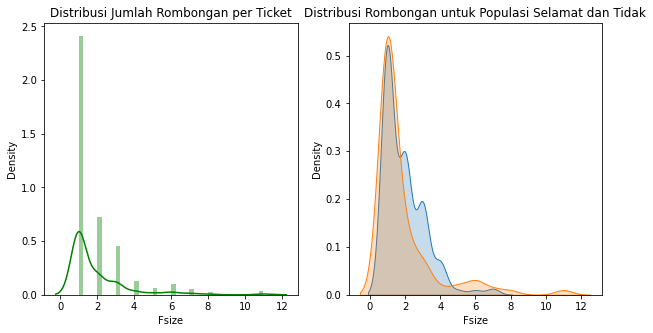

In [31]:
#Distribusi Jumlah Rombongan
fig, axarr = plt.subplots(1,2,figsize=(10,5))
axarr[0].set_title('Distribusi Jumlah Rombongan per Ticket')
f = sns.distplot(data['Fsize'], color='g', bins=40, ax=axarr[0])
axarr[1].set_title('Distribusi Rombongan untuk Populasi Selamat dan Tidak')
g = sns.kdeplot(data['Fsize'].loc[data['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Fsize')
g = sns.kdeplot(data['Fsize'].loc[data['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')

### Age Bins
di-run setelah Missing Value di Age di Treatment

In [41]:
data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [42]:
print(data['Age'].max())
print(data['Age'].min())

80.0
0.42


pd.qcut adalah metode binning dengan memperhatikan distribusi data.

In [46]:
#Making Bins Otomatis
data['AgeBin'] = pd.qcut(data['Age'], 5)
label = LabelEncoder()
data['AgeBin_Code'] = label.fit_transform(data['AgeBin'])

In [47]:
data['AgeBin'].value_counts()

(26.0, 30.0]     209
(0.419, 20.0]    183
(38.0, 80.0]     178
(20.0, 26.0]     176
(30.0, 38.0]     145
Name: AgeBin, dtype: int64

In [48]:
print(data[['AgeBin', 'Survived']].groupby(['AgeBin'], as_index=False).mean())

          AgeBin  Survived
0  (0.419, 20.0]  0.459016
1   (20.0, 26.0]  0.397727
2   (26.0, 30.0]  0.239234
3   (30.0, 38.0]  0.496552
4   (38.0, 80.0]  0.370787


### Fare Bins

In [39]:
# Making Bins Otomatis
data['FareBin'] = pd.qcut(data['Fare'], 5)

label = LabelEncoder()
data['FareBin_Code'] = label.fit_transform(data['FareBin'])

In [40]:
data['FareBin'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: FareBin, dtype: int64

In [ ]:
print(data[['FareBin', 'Survived']].groupby(['FareBin'], as_index=False).mean())

             FareBin  Survived
0    (-0.001, 7.854]  0.217877
1      (7.854, 10.5]  0.201087
2     (10.5, 21.679]  0.424419
3   (21.679, 39.688]  0.444444
4  (39.688, 512.329]  0.642045


In [ ]:
print(data['Fare'].max())
print(data['Fare'].min())

512.3292
0.0


## Missing Value Treatment

### Mengisi Age dengan pertimbangan Title

In [43]:
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = data.groupby('Title')['Age'].median()[titles.index(title)]
    data.loc[(data['Age'].isnull()) & (data['Title'] == title), 'Age'] = age_to_impute

In [44]:
data['Age'].isnull().sum()

0

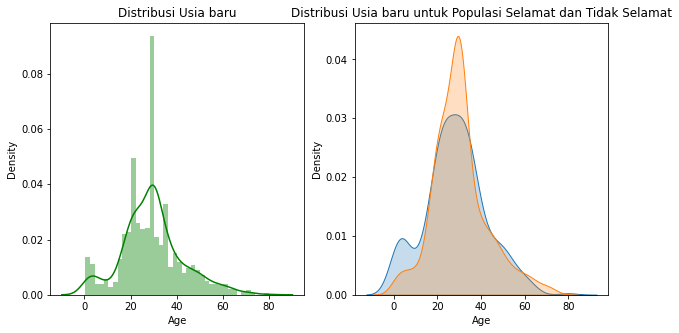

In [45]:
#Distibusi Usia Baru
fig, axarr = plt.subplots(1,2,figsize=(10,5))
axarr[0].set_title('Distribusi Usia baru')
f = sns.distplot(data['Age'], color='g', bins=40, ax=axarr[0])
axarr[1].set_title('Distribusi Usia baru untuk Populasi Selamat dan Tidak Selamat')
g = sns.kdeplot(data['Age'].loc[data['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
g = sns.kdeplot(data['Age'].loc[data['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')

## Make New DataFrame

**Copy dataframe ke DataFrame baru (data_p)**

In [49]:
#copy data
data_p = data.copy()
data_p.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,AgeBin,FareBin,FareBin_Code,AgeBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,"(20.0, 26.0]","(-0.001, 7.854]",0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,"(30.0, 38.0]","(39.688, 512.329]",4,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,"(20.0, 26.0]","(7.854, 10.5]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,"(30.0, 38.0]","(39.688, 512.329]",4,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,"(30.0, 38.0]","(7.854, 10.5]",1,3


In [50]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      889 non-null    object  
 12  Title         891 non-null    object  
 13  Fsize         891 non-null    int64   
 14  AgeBin        891 non-null    category
 15  FareBin       891 non-null    category
 16  FareBin_Code  891 non-null    int64   
 17  AgeBin_Code   891 non-null    int64   
dtypes: categor

**Preprocessing Data_p**

In [52]:
#Drop
labels_drop = ['PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 
               'Embarked','Title','Fare', 'FareBin', 'AgeBin','Age']
data_p.drop(labels = labels_drop, axis = 1, inplace = True)

In [53]:
#Replace
data_p['Sex'] = data_p['Sex'].map({"male": 0, "female":1})

**Cek DataFrame yang sudah di preprocessing**

In [54]:
data_p.head()

,Survived,Pclass,Sex,Fsize,FareBin_Code,AgeBin_Code
0,0,3,0,2,0,1
1,1,1,1,2,4,3
2,1,3,1,1,1,1
3,1,1,1,2,4,3
4,0,3,0,1,1,3


**Simpen DataFrame hasil Preprocessing kedalam csv**

In [56]:
data_p.to_csv('titanic_prep.csv',index=False)